In [1]:
import pandas as pd

# Working with Outliers

An outlier is a data point that is significantly different from the remaining data. Statistical
parameters such as the mean and variance are sensitive to outliers.

Ways to handle outliers
- Trimming outliers from the dataset
- Performing winsorization
- Capping the variable at arbitrary maximum and minimum values
- Performing zero-coding – capping the variable values at zero

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import warnings
warnings. simplefilter("ignore")

In [7]:
# Let's load the Boston House Prices dataset from scikit-learn:

boston_dataset = load_boston()

In [8]:
boston = pd.DataFrame(boston_dataset.data, 
                      columns= boston_dataset.feature_names)[['RM', 'LSTAT', 'CRIM']]

In [9]:
boston.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


<AxesSubplot:xlabel='RM'>

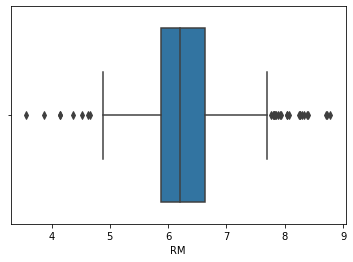

In [18]:
sns.boxplot(boston['RM'])

Let's create a function to find the boundaries of a variable distribution, using the
inter-quartile range proximity rule:


In [15]:
def find_boundaries(df, variable, distance):
 IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
 lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
 upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
 return upper_boundary, lower_boundary


In [20]:
#  Let's use the function from step 5 to determine the limits of the RM variable:

RM_upper_limit, RM_lower_limit = find_boundaries(boston, 'RM', 1.5)

In [21]:
# Let's print those limits beyond which we will consider a value an outlier:

RM_upper_limit, RM_lower_limit

(7.730500000000001, 4.778499999999999)

In [28]:
# Let's create a Boolean vector to flag the outliers in RM

outliers_RM = np.where(boston['RM'] > RM_upper_limit, True, np.where(boston['RM'] < RM_lower_limit, True, False)


SyntaxError: unexpected EOF while parsing (2993451490.py, line 3)